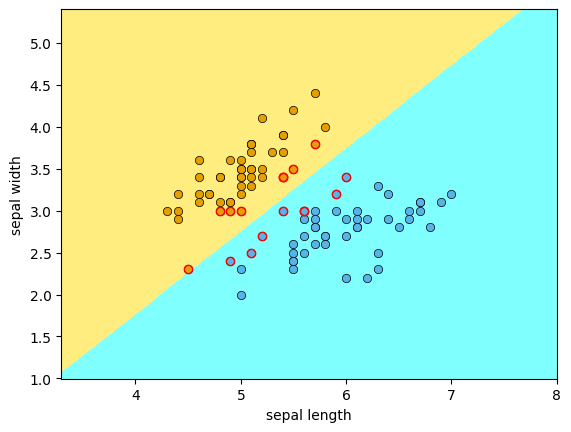

正解率 100.0


In [12]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは2 (iris virginica) でないもの,
# つまり iris setosa (0) と iris versicolor (1) のみを対象とする
# (領域の2分割)
X = X[y!=2]
y = y[y!=2]

# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap01, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# iris setosa のデータXc0をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()

result = clf.predict(X)
total = len(X)
success = sum(result==y)
print('正解率', success/total*100)

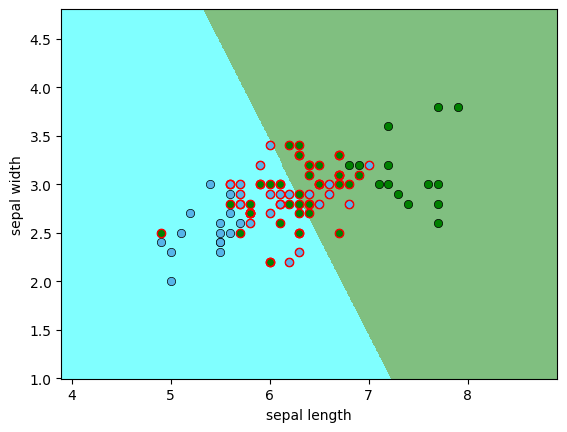

正解率 73.0


In [11]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは0 (iris setosa) でないもの,
# つまり iris versicolor (1) と iris virginica (2) のみを対象とする
# (領域の2分割)
X = X[y!=0]
y = y[y!=0]

# 分類用にサポートベクトルマシンを用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(1か2)の予測をZに格納
Z = clf.predict(Xg)

# グリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
# クラス2 (iris setosa) が薄緑 (0.5, 0.75, 0.5, 1)
cmap12 = ListedColormap([(0.5, 0.75, 0.5, 1), (0.5, 1, 1, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==1, cmap=cmap12, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]
# iris virginica (y=2) のデータのみを取り出す
Xc2 = X[y==2]

# iris versicolor のデータXc1をプロット
plt.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9',linewidth=0.5, edgecolors='black')
# iris virginica のデータXc2をプロット
plt.scatter(Xc2[:,0], Xc2[:,1], c='#008000',linewidth=0.5, edgecolors='black')

# サポートベクトルの取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()

result = clf.predict(X)
total = len(X)
success = sum(result==y)
print('正解率', success/total*100)

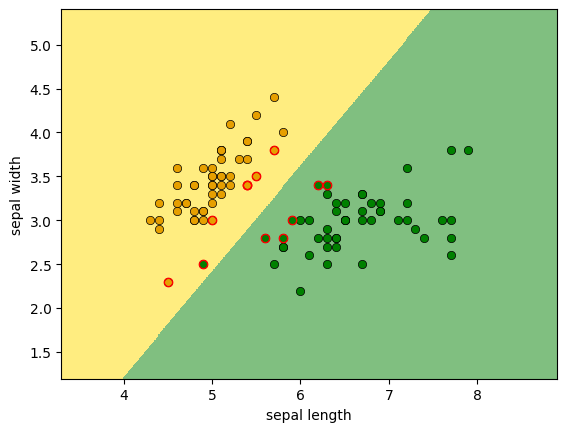

正解率 99.0


In [10]:
# -*- coding: utf-8 -*-
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# アヤメのデータをロードし、変数irisに格納
iris = datasets.load_iris()

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を外花被片の長さ(sepal length)と幅(sepal width)の
# 2つのみに制限(2次元で考えるため)
X = X[:,:2]

# ターゲットは0 (iris setosa) でないもの,
# つまり iris versicolor (1) と iris virginica (2) のみを対象とする
# (領域の2分割)
X = X[y!=1]
y = y[y!=1]

# 分類用にサポートベクトルマシンを用意
clf = svm.SVC(C=1.0, kernel='linear')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0]) - 1
x_max = max(X[:,0]) + 1
y_min = min(X[:,1]) - 1
y_max = max(X[:,1]) + 1

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(1か2)の予測をZに格納
Z = clf.predict(Xg)

# グリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス2 (iris virginica) が薄緑 (0.5, 0.75, 0.5, 1)
cmap02 = ListedColormap([(0.5, 0.75, 0.5, 1), (1, 0.93, 0.5, 1)])

# 背景の色を表示
plt.pcolormesh(XX, YY, Z==0, cmap=cmap02, shading='auto')

# 軸ラベルを設定
plt.xlabel('sepal length')
plt.ylabel('sepal width')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris virginica (y=2) のデータのみを取り出す
Xc2 = X[y==2]

# iris setosa のデータXc10をプロット
plt.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00',linewidth=0.5, edgecolors='black')
# iris virginica のデータXc2をプロット
plt.scatter(Xc2[:,0], Xc2[:,1], c='#008000',linewidth=0.5, edgecolors='black')

# サポートベクトルの取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
svgraph = plt.scatter(SV[:,0], SV[:,1], linewidths=1.0, edgecolors='red')
svgraph.set_facecolor((0,0,0,0))

# 描画したグラフを表示
plt.show()

result = clf.predict(X)
total = len(X)
success = sum(result==y)
print('正解率', success/total*100)